<a href="https://colab.research.google.com/github/jolurf/Computer-Vision/blob/main/Classical_CV/restoration_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 3 : Restoration

In this part of the TP, we are going to look at image restoration. We will look at several type of noise and ways to remove this noise. We first define some helper functions.

### Your task

In the lab work, you must fill in the code in the places marked FILL IN CODE, or answer the written questions directly on the notebook.

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import imageio
from skimage import color

is_colab = False


def read_image(file_name):
    img_color = imageio.imread(file_name)
    img_gray = color.rgb2gray(img_color)
    return img_gray,img_color

def write_image(img_in,file_name_out):
    imageio.imwrite(file_name_out, np.uint8(255.0*img_in))

def display_image(img_in):
    plt.figure(figsize=(10, 10))
    if (img_in.ndim == 2):
        plt.imshow(img_in,cmap='gray')
    elif (img_in.ndim == 3):
        # careful, in this case we supppose the pixel values are between 0 and 255
        plt.imshow(np.uint8(img_in))
    else:
        print('Error, unknown number of dimensions in image')
    return



(600, 800)

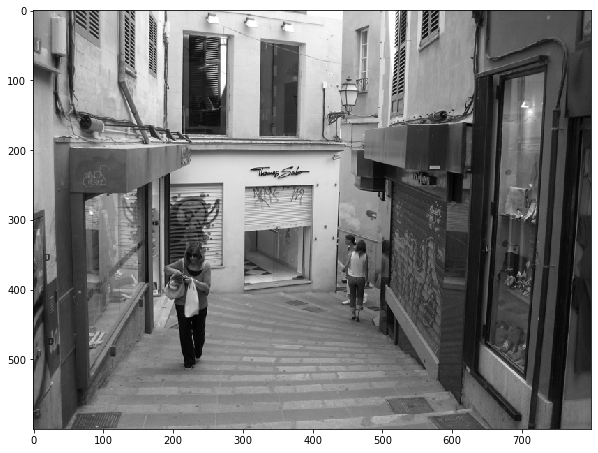

In [ ]:
file_dir = 'images/'
file_name = 'palma'
file_ext = '.png'

if (is_colab == True):
  !wget "https://perso.telecom-paristech.fr/anewson/doc/images/palma.png"
  img_gray,_ = read_image(file_name+file_ext)
else:
  img_gray,_ = read_image(file_dir+file_name+file_ext)

display_image(img_gray)
img_gray.shape

We will look at the following noise types :

- Gaussian noise
- Impulse (salt-and-pepper, 0 or 1) noise
- Missing pixels

Fill in the following functions to add this noise to a gray-level image. Do not forget to clip the pixel values to the range $(0,1)$ (np.clip).

In [ ]:
def add_gaussian_noise(img_in,sigma_noise = 0.01):
    img_out = img_in + sigma_noise * np.random.randn(*img_in.shape)
    img_out = np.clip(img_out,0,1)
    # FILL IN CODE

    return img_out

# we define the impulse probability p as the probability of a pixel not being affected
def add_impulse_noise(img_in,p=0.9):
    # FILL IN CODE
    mask = np.random.binomial(1,1-p,size = img_in.shape)
    img_out = img_in.copy()
    img_out[np.where(mask == 1)] = np.random.binomial(1,.5,size=img_out[np.where(mask == 1)].shape)
    img_out = np.clip(img_out,0,1)
    return img_out

def add_missing_pixels_noise(img_in,p=0.9):
    # FILL IN CODE
    bern = np.random.binomial(1,p,size=img_in.shape)
    img_out = img_in * bern
    img_out = np.clip(img_out,0,1)
    return img_out

Add the different noises to the input image, and display (or write) the results. Use the following parameters :

- sigma_noise=0.05 for the gaussian noise
- $p=0.9$, the probability of a pixel __not__ being affected, for the impulse noise and missing pixels

In [ ]:
sigma_noise = 0.05
img_gray_gaussian = add_gaussian_noise(img_gray, sigma_noise)
write_image(img_gray_gaussian,file_name+'_gaussian_noise.png')

img_gray_impulse = add_impulse_noise(img_gray, 0.9)
write_image(img_gray_impulse,file_name+'_impulse_noise.png')

img_gray_missing = add_missing_pixels_noise(img_gray, 0.9)
write_image(img_gray_missing,file_name+'_missing_pixels.png')

__Question__ For each type of noise, propose a restoration filter (see course slides).

__Answer__

For the gaussian noise, we use a smoothing filter, gaussian filter.<br>
For the other two, impulse noise and random missing pixels, the median filter is adequate.

Implement these restoration filters in appropriately named functions, and write the corresponding output images. Try to find the parameters which give the best results (visually).

__IMPORTANT NOTE__, you can use the filtering functions of the ``scipy.ndimage`` package, where the filtering is already implemented (do not re-implement the filters)

In [ ]:
from scipy import ndimage

# FILL IN CODE : CREATE THE FUNCTIONS TO CARRY OUT THE RESTORATION FILTERS AND WRITE THE RESULTS
def gaussian_filter(img_in, sigma):
    img_out = ndimage.gaussian_filter(img_in, sigma)
    img_out = np.clip(img_out,0,1)
    return img_out


def median_filter(img_in, size) :
    img_out = ndimage.median_filter(img_in, size=size)
    img_out = np.clip(img_out,0,1)
    return img_out



# Gaussian Filter

In [ ]:
img_gaussian = []
sigmas = []
for sigma in np.logspace(-.25,.25,4):
    img_gaussian.append(gaussian_filter(img_gray_gaussian,sigma))
    sigmas.append(sigma)

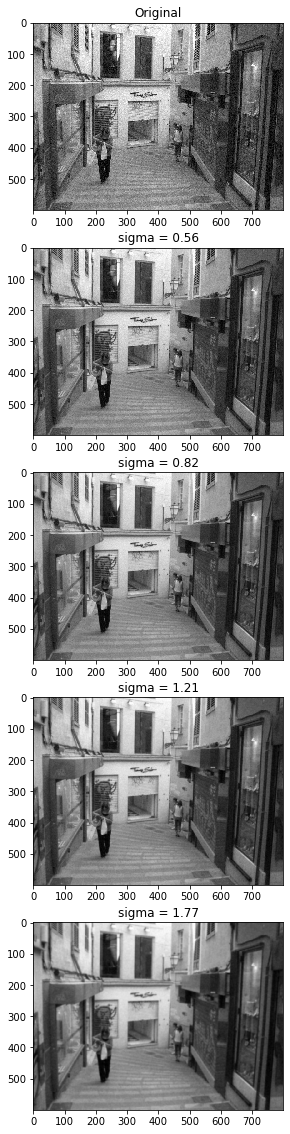

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=1,figsize=(20,20))
ax[0].imshow(img_gray_gaussian,cmap='gray')
ax[0].title.set_text("Original")
for i in range(0,4):
    ax[i+1].imshow(img_gaussian[i],cmap='gray')
    ax[i+1].title.set_text('sigma = {!s:.4}'.format(sigmas[i]))

__Question__ Roughly speaking, what is the tradeoff which you are trying to achieve by tuning the parameters ?

__Answer__
By tuning the parameters, using the gaussian filter we want to eliminate the outlying dots (as if the image was old) and to avoid the blur.

# Median Filter for impulse noise

In [ ]:
img_median_impulse = [img_gray_impulse]
img_median_missing = [img_gray_missing]
for size in range(1,23,2):
    img_median_impulse.append(median_filter(img_gray_impulse,size))
    img_median_missing.append(median_filter(img_gray_missing,size))



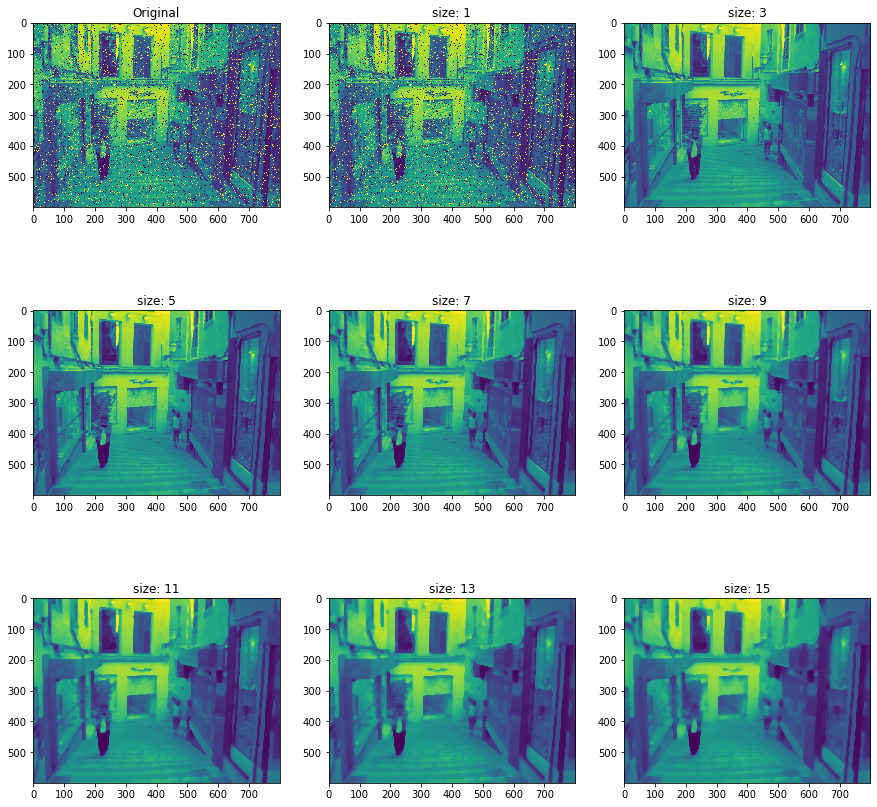

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(15,15))
for i in range(0,9):
    ax[i//3][i%3].imshow(img_median_impulse[i])
    if i==0:
        ax[i//3][i%3].title.set_text('Original')
    else:
        ax[i//3][i%3].title.set_text('size: {}'.format(2*i-1))


# Median Filter for missing pixels

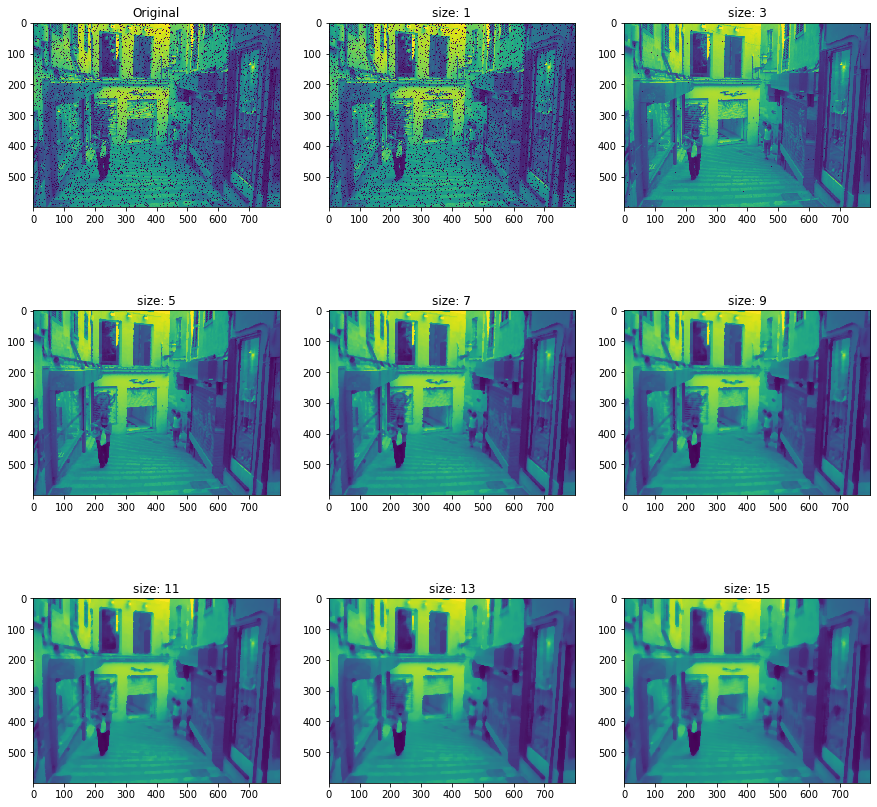

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(15,15))
for i in range(0,9):
    ax[i//3][i%3].imshow(img_median_missing[i])
    if i==0:
        ax[i//3][i%3].title.set_text('Original')
    else:
        ax[i//3][i%3].title.set_text('size: {}'.format(2*i-1))


__Answer__:
We want to retrieve information lost due to noise.
In the cases above, we try to trade noise for blurring.

### Evaluation

A commonly used metric for denoising is the ''Peak Signal-to-Noise Ratio'' (PSNR). This is linked to the commonly known mean squared error. The mean squared error is defined, for a reference image $Y$ and a restored image $Y$, of size $m \times n$ as :

- MSE$(Y,I) = \frac{1}{mn} \sum_{x,y} \left( I_{x,y} - Y_{x,y}\right)^2 $

The PSNR is defined, in Decibels, as :

PSNR$(Y,I) = 10 * \log{\left( \frac{I_{max}^2}{MSE(Y,I)} \right)}$,

where $I_{max}$ is the maximum value of the image. For us (normalised to 1), this gives :

PSNR$(Y,I) = -10 * \log{ \left({MSE(Y,I)} \right)}$.

Implement this in a function, and create a code to plot the PSNR for several values of the paramter, __in the Gaussian case only (first filter)__.

In [ ]:
def PSNR(img,img_ref):
    # FILL IN CODE
    mse = np.mean((img-img_ref)**2)
    psnr = -10*np.log(mse)
    return psnr

# FILL IN CODE : TEST THE PSNR FOR SEVERAL VALUES OF SIGMA
for sigma in np.logspace(-1,.1,10):
    y = gaussian_filter(img_gray_gaussian,sigma)
    print("For {} we got a PSNR of {}".format(sigma, PSNR(img_gray,y)))

For 0.1 we got a PSNR of 60.025058474013164
For 0.13250193550567485 we got a PSNR of 60.02505847404735
For 0.17556762912750015 we got a PSNR of 60.0250656742056
For 0.23263050671536262 we got a PSNR of 60.032811030096525
For 0.30823992397451433 we got a PSNR of 60.434019001782
For 0.40842386526745217 we got a PSNR of 63.57054711062288
For 0.5411695265464638 we got a PSNR of 68.84055181751685
For 0.7170600970409613 we got a PSNR of 69.49643346240258
For 0.9501185073181438 we got a PSNR of 66.9799013609232
For 1.2589254117941673 we got a PSNR of 63.79700545185326


Notice that here we want to maximizez the PSNR so as to minimize the MSE.

## FUTHER RESTORATION TECHNIQUES (THIS IS NOT OBLIGATORY)

## Deconvolution

In this part of the TP, we are going to try and invert a convolution operation. This is called __deconvolution__, and can be carried out in the Fourier domain, as follows. For an image $I$, filter $f$ and an output $Y$, if we have :

$Y = I \ast f$,

then using the convolution theorem (see lesson), we have :

$I = \text{IFFT}\left(\frac{\hat{Y}}{\hat{f}}\right)$

where $\hat{Y}$ and $\hat{f}$ are the Fourier transforms of $Y$ and $f$ respectively.

To simplify the problem, we take a square image for this part of the TP.


(600, 600)

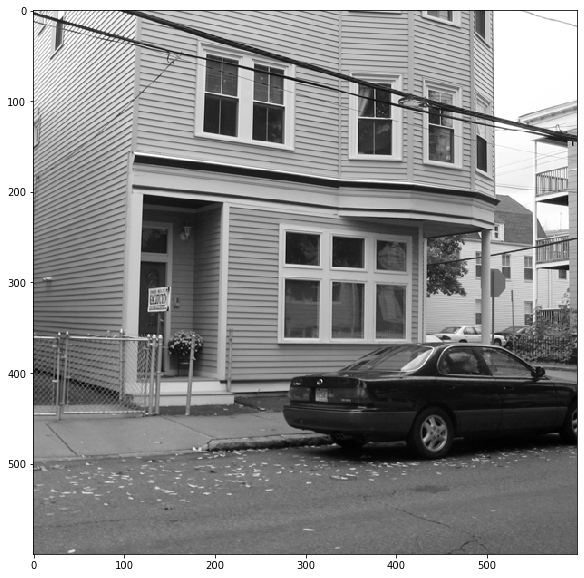

In [ ]:
file_dir = 'images/'
file_name = 'boston'
file_ext = '.png'

if (is_colab == True):
  !wget "https://perso.telecom-paristech.fr/anewson/doc/images/boston.png"
  img_gray,_ = read_image(file_name+file_ext)
else:
    img_gray,_ = read_image(file_dir+file_name+file_ext)
img_gray.shape

display_image(img_gray)
img_gray.shape

Now, let us consider the following fiter, defined in the Fourier domain :

(600, 600)


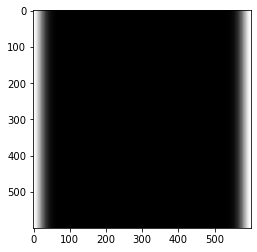

In [ ]:
from scipy import signal

img_size = img_gray.shape[0]
h_size = int(np.floor(img_size/2.0))
f_hat = np.zeros((img_size,img_size))

X = np.asarray(range(-h_size,h_size))
f_hat = np.tile( np.expand_dims( np.exp(-( X**2) / (2.0*(20.0**2))) , axis=1), (1,img_size)).T
f_hat /= f_hat.sum()
f_hat = np.fft.ifftshift(f_hat)
plt.imshow( np.log( np.abs(f_hat)+1), cmap = 'gray')

print(f_hat.shape)

Using the convolution theorem and the inverse Fourier transform, carry out the convolution of the input image with $f$ (in the Fourier domain, so using $\hat{f}$) and write the result ``img_convolved`` to an output file

__Question__ What does this filter do (you can use the visualisation method from the first part of the TP to see what the filter spectrum looks like) ?
 How can this happen in real life ?

In [ ]:
img_convolved = np.fft.fft2(img_gray)*f_hat# FILL IN CODE
img_convolved = np.real(np.fft.ifft2(img_convolved))

img_convolved -= img_convolved.min()
img_convolved /= img_convolved.max()

write_image(img_convolved,file_name+'_convolution.png')
img_convolved.max()

1.0

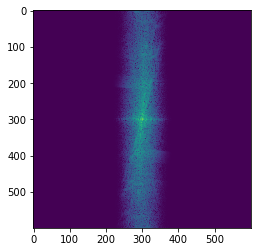

In [ ]:
def display_spectrum(img):
    # FILL IN CODE
    image = np.fft.fftshift(np.fft.fft2(img))
    plt.imshow(np.log(1+np.absolute(image)))
    return
display_spectrum(img_convolved)


__Answer__
This filter just allows the middle of the spectrum to exist and it blurs the image. In real life, it reminds me of a moving camera.

Now, create a function which carries out a deconvolution in the Fourier domain, given an image and the Fourier transform of the filter $\hat{f}$. You can reuse the code in the first part of the TP. Carry out the deconvolution on ``img_convolved`` and write the result to an output file. Remember to renormalise the output image.

__Important note__ : You will have a problem with very small values of $\hat{f}$ (division by 0). Propose a simple method to address this issue.


To address this issue, we should add epsilon to f_hat

In [ ]:
import scipy
eps = 1e-8
def deconvolve_fourier(img,f_hat):
    # FILL IN CODE
    img_hat = np.fft.fft2(img)
    img_out = np.fft.ifft2(img_hat/(f_hat+eps))

    return img_out


img_out = np.real(deconvolve_fourier(img_convolved,f_hat))
img_out -= img_out.min()
img_out /= img_out.max()


write_image(img_out,file_name+'_deconvolved.png')

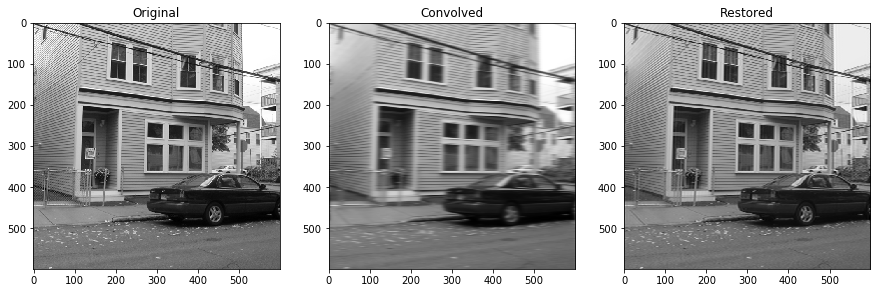

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
ax[0].imshow(img_gray, cmap='gray')
ax[0].title.set_text("Original")
ax[1].imshow(img_convolved, cmap='gray')
ax[1].title.set_text("Convolved")
ax[2].imshow(img_out, cmap='gray')
ax[2].title.set_text("Restored")